### Adding Emotion and Mouth position columns to the dataframe

In [10]:
import pandas as pd

df = pd.read_csv('RADIATE_Color_Faces_AU.csv', index_col=0)

df["emotion"] = df.index
df["emotion"] = df["emotion"].str.extract(r'.*_(.*).bmp')
# extract (.)(.) from the emotion column
temp = df["emotion"].str.extract(r'(.)(.)')

df["emotion"] = temp[0]
df["mouth"] = temp[1]

# if emotion is A, then replace A with angry
df["emotion"] = df["emotion"].replace("A", "angry")
# if emotion is C, then replace H with calm
df["emotion"] = df["emotion"].replace("C", "calm")
# if emotion is D, then replace D with disgust
df["emotion"] = df["emotion"].replace("D", "disgust")
# if emotion is F, then replace F with fear
df["emotion"] = df["emotion"].replace("F", "fear")
# if emotion is H, then replace H with happy
df["emotion"] = df["emotion"].replace("H", "happy")
# if emotion is N, then replace N with neutral
df["emotion"] = df["emotion"].replace("N", "neutral")

# if emotion is S, and mouth is U in the same row, then replace S with surprise
df.loc[(df["emotion"] == "S") & (df["mouth"] == "U"), "emotion"] = "surprise"
# if emotion is S, and mouth is not U in the same row, then replace S with sad
df.loc[(df["emotion"] == "S") & (df["mouth"] != "U"), "emotion"] = "sad"

# if mouth is O, then replace O with open
df["mouth"] = df["mouth"].replace("O", "open")
# if mouth is C, then replace C with closed
df["mouth"] = df["mouth"].replace("C", "closed")
# if mouth is U, then replace U with N/A
df["mouth"] = df["mouth"].replace("U", "N/A")
# if mouth is E, then replace E with exuberant
df["mouth"] = df["mouth"].replace("E", "exuberant")

# create an emotionID column
df["emotionID"] = df["emotion"].astype('category').cat.codes

# create a mouthID column
df["mouthID"] = df["mouth"].astype('category').cat.codes

# put the emotion and emotionID columns and mouth and mouthID columns at the beginning of the dataframe
df = df[["emotion", "emotionID", "mouth", "mouthID"] + [col for col in df.columns if col not in ["emotion", "emotionID", "mouth", "mouthID"]]]

# print first 15 rows
print(df.head(15))

               emotion  emotionID      mouth  mouthID      AU01      AU02  \
AF01_AC.bmp      angry          0     closed        1  0.495898  0.146762   
AF01_AO.bmp      angry          0       open        3  0.282826  0.065132   
AF01_CC.bmp       calm          1     closed        1  0.404276  0.129260   
AF01_CO.bmp       calm          1       open        3  0.430970  0.289695   
AF01_DC.bmp    disgust          2     closed        1  0.290751  0.143386   
AF01_DO.bmp    disgust          2       open        3  0.432929  0.075790   
AF01_FC.bmp       fear          3     closed        1  0.713720  0.474423   
AF01_FO.bmp       fear          3       open        3  0.634923  0.563915   
AF01_HC.bmp      happy          4     closed        1  0.566416  0.156642   
AF01_HE.bmp      happy          4  exuberant        2  0.380238  0.290982   
AF01_HO.bmp      happy          4       open        3  0.251061  0.258449   
AF01_NC.bmp    neutral          5     closed        1  0.296070  0.181766   

### Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

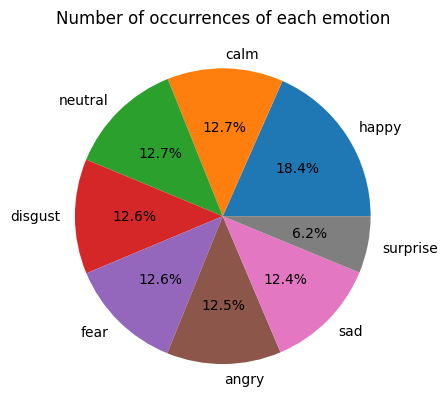

In [3]:
# count the number of occurrences of each emotion in the dataset
emotion_counts = df["emotion"].value_counts()

# plot a pie chart of the number of occurrences of each emotion in the dataset
import matplotlib.pyplot as plt
emotion_counts.plot.pie(autopct="%.1f%%")
plt.title("Number of occurrences of each emotion")
plt.ylabel("")
plt.show()

### Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train test split
X = df.drop(columns=["emotion", "emotionID", "mouth"])
y = df["emotionID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForestClassifier Accuracy: 0.6656976744186046


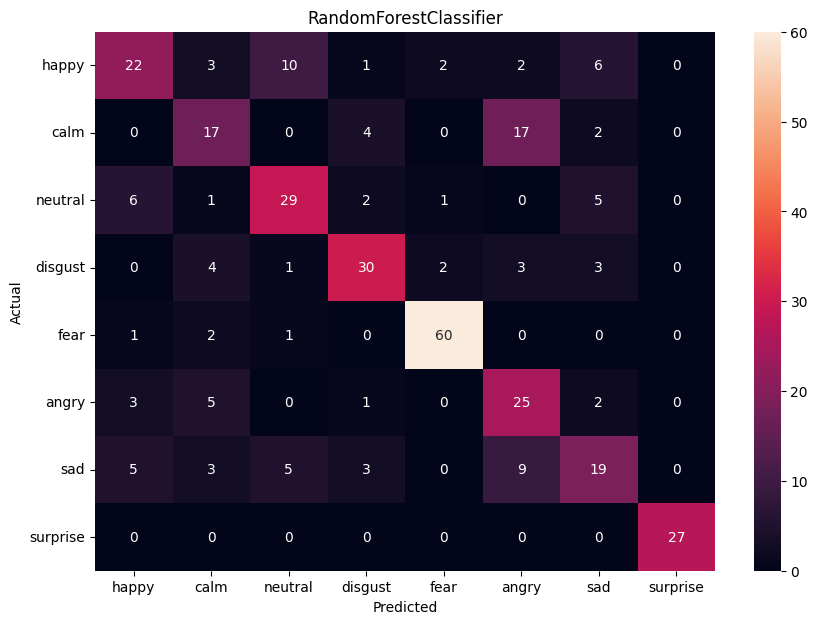

SVC Accuracy: 0.6598837209302325


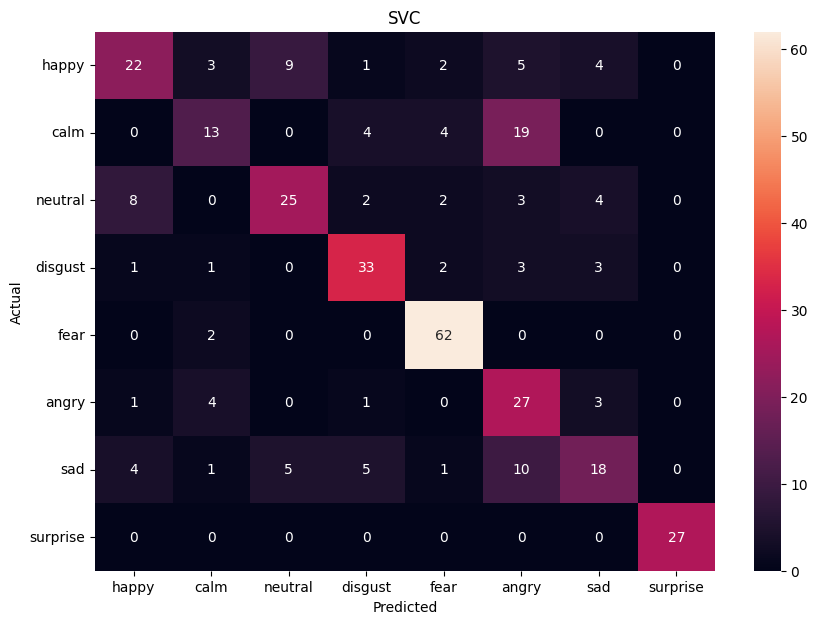

DecisionTreeClassifier Accuracy: 0.5436046511627907


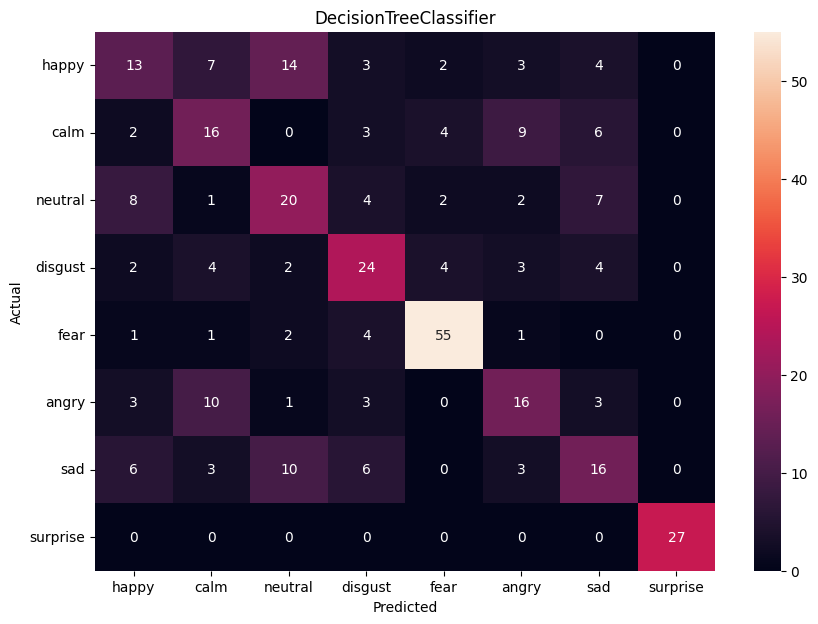

XGBClassifier Accuracy: 0.6569767441860465


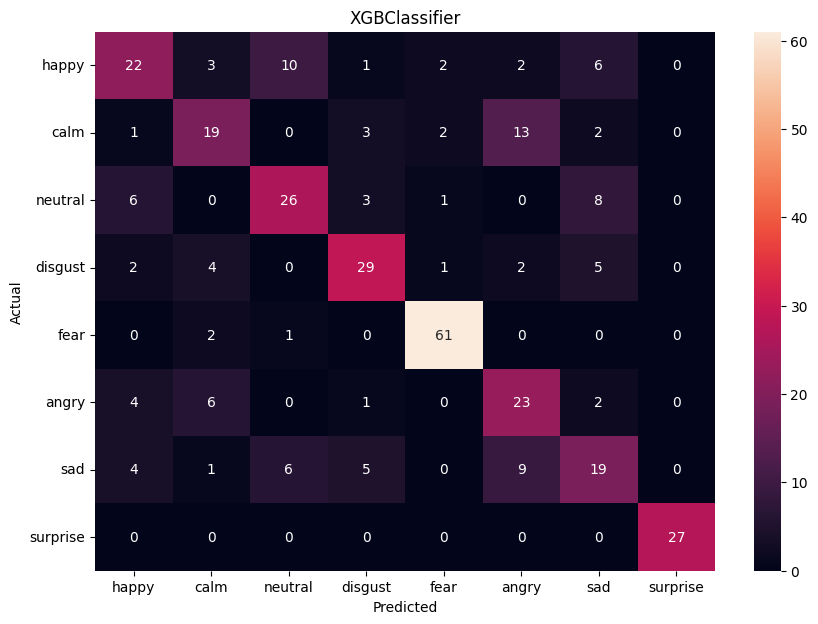

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# find the best classifier for the dataset, set the random_state to 42
classifiers = [
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42)
]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "Accuracy:", accuracy_score(y_test, y_pred))

    # plot how many times emotion is predicted correctly
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    # put ticks at the center of each cell
    plt.xticks(ticks=[i + 0.5 for i in range(len(emotion_counts))], labels=emotion_counts.index)
    plt.yticks(ticks=[i + 0.5 for i in range(len(emotion_counts))], labels=emotion_counts.index, rotation=0)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(clf.__class__.__name__)
    plt.show()

### Feature Importance

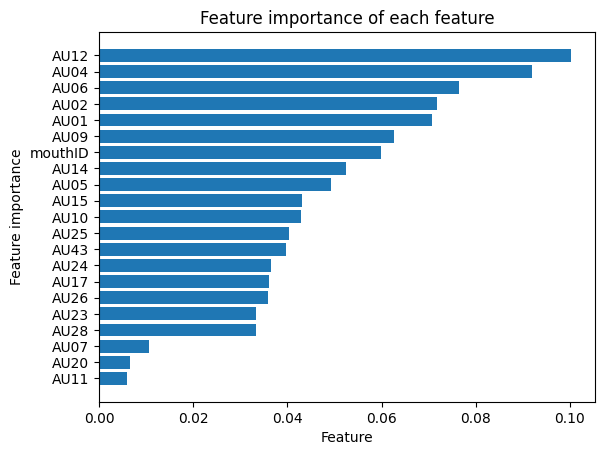

In [8]:
import matplotlib.pyplot as plt

# feature importance
feature_importance = clf.feature_importances_

# plot feature importance
sorted_idx = feature_importance.argsort()
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.title("Feature importance of each feature")
plt.show()

BELOW WE WILL IMPORT THE UIBFVED DATASET AND TEST THE ABOVE CLASSIFIER ON A DIFFERENT DATASET

In [ ]:
import numpy as np
df2 = pd.read_csv('UIBVFED_AU.csv', index_col=0)
df2

In [78]:
df2["emotion"] = df2.index
df2["emotion"] = df2["emotion"].str.extract(r'_(\w+)\.png')

df2['mouth'] = df2['emotion']
df2['mouth'] = df2['mouth'].replace(['EnragedShouting', 'Terror', 'VeryFrightened', 'FalseLaughter1', 'FalseLaughter2', 'Laughter', 'SmilingOpenMouthed', 'UproariousLaughter', 'CryingOpenMouthed', 'Suprise'], 'open')
df2['mouth'] = np.where(df2['mouth'] != 'open', 'closed', df2['mouth'])

df2["emotion"] = df2["emotion"].replace(['EnragedCompressedLips', 'EnragedShouting', 'Mad', 'SternnessAnger'], "angry") #0
df2["emotion"] = df2["emotion"].replace('Surprise', "surprise") #7
df2["emotion"] = df2["emotion"].replace(['Disdain', 'Disgust', 'PhysicalRepulsion'], 'disgust') #2
df2["emotion"] = df2["emotion"].replace(['Afraid', 'Terror', 'VeryFrightened', 'Worried'], "fear") #3
df2["emotion"] = df2["emotion"].replace(['AbashedSmile', 'DebauchedSmile', 'EagerSmile', 'FalseLaughter1', 'FalseLaughter2',
                                         'FalseSmile', 'IngratiatingSmile', 'Laughter', 'MelancholySmile', 'SlySmile', 'SmilingClosedMouth', 'SmilingOpenMouthed', 'StifledSmile', 'UproariousLaughter'], "happy") #4
df2["emotion"] = df2["emotion"].replace(['CryingClosedMouth', 'CryingOpenMouthed', 'Miserable', 'NearlyCrying', 'Sad', 'SuppressedSadness'], "sad") #6
df2["emotion"] = df2["emotion"].replace('Neutral', 'neutral') #5

df2['emotionID'] = df2['emotion']
df2['mouthID'] = df2['mouth']

df2['emotionID'] = df2['emotionID'].replace('angry', 0)
df2['emotionID'] = df2['emotionID'].replace('disgust', 2)
df2['emotionID'] = df2['emotionID'].replace('fear', 3)
df2['emotionID'] = df2['emotionID'].replace('happy', 4)
df2['emotionID'] = df2['emotionID'].replace('neutral', 5)
df2['emotionID'] = df2['emotionID'].replace('sad', 6)
df2['emotionID'] = df2['emotionID'].replace('surprise', 7)

df2['mouthID'] = df2['mouthID'].replace('open', 3)
df2['mouthID'] = df2['mouthID'].replace('closed', 1)

df2 = df2[["emotion", "emotionID", "mouth", "mouthID"] + [col for col in df2.columns if col not in ["emotion", "emotionID", "mouth", "mouthID"]]]

df2

,emotion,emotionID,mouth,mouthID,AU01,AU02,AU04,AU05,AU06,AU07,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
Pere_Worried.png,fear,3,closed,1,0.315855,0.314865,0.516908,0.266781,0.698766,1.0,...,0.339189,0.461196,0.597699,0.0,0.341139,0.286717,0.503181,0.420191,0.264994,0.129035
Isabel_EnragedCompressedLips.png,angry,0,closed,1,0.120282,0.146698,0.617403,0.336132,0.201478,0.0,...,0.312350,0.529808,0.598293,0.0,0.358172,0.465458,0.117415,0.251331,0.074888,0.086033
Joana_Mad.png,angry,0,closed,1,0.252119,0.116135,0.128887,0.594530,0.089818,0.0,...,0.446402,0.234925,0.354394,1.0,0.707836,0.634586,0.643819,0.551592,0.169124,0.055794
Dave_FalseLaughter1.png,happy,4,open,3,0.297601,0.296326,0.188997,0.401070,0.334416,1.0,...,0.610653,0.450410,0.237715,1.0,0.250875,0.006015,0.999921,0.687085,0.033038,0.029305
Isabel_Terror.png,fear,3,open,3,0.365325,0.270436,0.640903,0.652462,0.223927,0.0,...,0.199209,0.089283,0.283121,1.0,0.363406,0.012498,0.999954,0.688843,0.033060,0.033808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Damia_Neutral.png,neutral,5,closed,1,0.358094,0.291281,0.163450,0.301980,0.680448,1.0,...,0.503110,0.487920,0.747755,1.0,0.754153,0.604370,0.996975,0.473178,0.074434,0.047021
Simona_AbashedSmile.png,happy,4,closed,1,0.377999,0.504034,0.287904,0.443344,0.383730,1.0,...,0.581881,0.220165,0.645394,1.0,0.584434,0.745784,0.342856,0.059390,0.387240,0.105262
Francisca_Disdain.png,disgust,2,closed,1,0.560998,0.193603,0.231002,0.334153,0.153729,0.0,...,0.349496,0.476254,0.549156,0.0,0.393636,0.627250,0.032408,0.082348,0.172294,0.029646
Tomeu_VeryFrightened.png,fear,3,open,3,0.301362,0.198389,0.300293,0.374935,0.239717,1.0,...,0.263867,0.393340,0.647819,0.0,0.416643,0.221148,0.998189,0.704036,0.033983,0.071193


In [79]:
X1 = df2.drop(columns=["emotion", "emotionID", "mouth"])
y1 = df2["emotionID"]
for clf in classifiers:
  y_pred1 = clf.predict(X1)
  print(clf.__class__.__name__, "Accuracy:", accuracy_score(y1, y_pred1))

RandomForestClassifier Accuracy: 0.3314814814814815
SVC Accuracy: 0.40925925925925927
DecisionTreeClassifier Accuracy: 0.21296296296296297
XGBClassifier Accuracy: 0.34814814814814815
